# Libraries

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from wordcloud import WordCloud
from nltk import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from scipy.sparse import csr_matrix
import seaborn as sns
from xgboost import XGBRegressor
import re
import math
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import adfuller
from scipy.stats import spearmanr
import dataframe_image as dfi

# Key Questions That Will be Covered In This Analysis

* What are the first top 5 Posts
* Which Social Media Network is most active?
* What Types of Posts Generate the Most Engagement?
* When Are Peak Engagement Times?
* What Is the Relationship Between Impressions and Engagement?
* Which Content Types Receive the Most Shares?
* How Effective Are Hashtags in Driving Engagement?
* How Do Different Types of Clicks Correlate with Engagement?
* Is There a Seasonal or Periodic Pattern in Engagement?
* What Is the Overall Engagement Rate and How Does It Vary Across Platforms?
* Most Used Words In the Social Media Posts

In [2]:
#Read in The Datasets
df1 = pd.read_excel("Post Performance (Stanbic IBTC) January 1, 2013 - July 13, 2023_Twitter.xls")
df2 = pd.read_csv("Post Performance (Stanbic IBTC) January 1, 2013 - July 13, 2023_Twitter.csv")
df3 = pd.read_excel("Post Performance (Stanbic IBTC) January 1, 2013 - July 13, 2023_LinkedIn.xls")

C:\Users\DELL\AppData\Local\Temp\ipykernel_2912\1545640043.py:3: DtypeWarning: Columns (32,33,41,53,61,78,146) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("Post Performance (Stanbic IBTC) January 1, 2013 - July 13, 2023_Twitter.csv")


In [3]:
#Merge The DataFrames
df = pd.concat([df1, df2, df3], ignore_index = True)
df.head()

,Date,Post ID,Network,Post Type,Content Type,Profile,Sent by,Link,Post,Linked Content,...,Video Removed from Playlists,Annotation Impressions,Annotation Clickable Impressions,Annotation Closable Impressions,Annotation Closes,Card Impressions,Card Teaser Impressions,Card Teaser Clicks,Poll Votes,Tags
0,7/13/2023 10:57 am,1679429829567940096,Twitter,Tweet,Photo,'@StanbicIBTC,Sophia Amuka,https://twitter.com/StanbicIBTC/status/1679429...,Your money should not be a gamble. Before you ...,https://twitter.com/StanbicIBTC/status/1679429...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CIB Posts
1,2023-12-07 20:03:00,1679204777081860096,Twitter,Tweet,Text,'@StanbicIBTC,Blessing Ubah,https://twitter.com/StanbicIBTC/status/1679204...,"What skill (s) do you have, that no one ever t...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-12-07 19:00:00,1679189012798660096,Twitter,Tweet,Photo,'@StanbicIBTC,Blessing Ubah,https://twitter.com/StanbicIBTC/status/1679189...,Sade was able to acquire a home loan and make ...,"https://bit.ly/StanbicIBTCHomeLoans, https://t...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Weekly Wealth Posts
3,2023-12-07 18:20:00,1679179017084349952,Twitter,Tweet,Photo,'@StanbicIBTC,Blessing Ubah,https://twitter.com/StanbicIBTC/status/1679179...,Here are some mistakes you shouldn‚Äôt make du...,https://twitter.com/StanbicIBTC/status/1679179...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-11-07 12:50:00,1678733396992740096,Twitter,Tweet,Photo,'@StanbicIBTC,Sophia Amuka,https://twitter.com/StanbicIBTC/status/1678733...,Safeguard every aspect of your operations with...,https://twitter.com/StanbicIBTC/status/1678733...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Insurance Limited Posts, Weekly Wealth Posts"


## Data Cleaning and Preprocessing

In [4]:
#Drop duplicates if any
df.drop_duplicates(inplace = True)

In [5]:
#Check out properties of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24818 entries, 0 to 24817
Columns: 147 entries, Date to Tags
dtypes: float64(119), int64(1), object(27)
memory usage: 28.0+ MB


In [6]:
#Check for missing values
df.isna().sum()

Date                           0
Post ID                        0
Network                        0
Post Type                      0
Content Type                   0
                           ...  
Card Impressions           24818
Card Teaser Impressions    24818
Card Teaser Clicks         24818
Poll Votes                 24816
Tags                       20378
Length: 147, dtype: int64

In [7]:
#Obtain features that has more than 20000 missing values
missing_cols = [x for x in df.columns if df[x].isna().sum() >= 20000]
len(missing_cols)

113

In [8]:
#Drop the features with more than 20000 missing values
df.drop(missing_cols, axis = 1, inplace = True)

df.drop('App Install Attempts', axis = 1, inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24818 entries, 0 to 24817
Data columns (total 33 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              24818 non-null  object 
 1   Post ID                           24818 non-null  int64  
 2   Network                           24818 non-null  object 
 3   Post Type                         24818 non-null  object 
 4   Content Type                      24818 non-null  object 
 5   Profile                           24818 non-null  object 
 6   Sent by                           24818 non-null  object 
 7   Link                              24718 non-null  object 
 8   Post                              24787 non-null  object 
 9   Linked Content                    10063 non-null  object 
 10  Impressions                       22016 non-null  object 
 11  Organic Impressions               22016 non-null  object 
 12  Pote

In [10]:
#Get a part of tha dataframe
num_df = df.iloc[:, 10:]
obj_cols = [x for x in num_df.columns if num_df[x].dtypes == object]

#Remove commas from numbers in the dataset
def cleaning(data):
    if type(data) != float:
        return data.replace(',', '')
    else:
        return data

for i in obj_cols:
    df[i] = df[i].apply(cleaning)

#Remove % from numbers with data
def remove_pct(data):
    if type(data) != float:
        if '%' in data:
            return data.replace('%', '')
        else: 
            return data
    else:
        return data

for i in obj_cols:
    df[i] = df[i].apply(remove_pct)

In [11]:
#Convert features to numerical data type
df[obj_cols] = df[obj_cols].astype(float)
df[obj_cols]

,Impressions,Organic Impressions,Potential Reach,Engagement Rate (per Impression),Engagements,Reactions,Likes,Shares,Click-Through Rate,Other Post Clicks,Post Clicks (All),Post Media Clicks,Post Detail Expand Clicks,Other Engagements,Media Views
0,445.0,445.0,345718.0,0.0360,16.0,4.0,4.0,1.0,NaN,9.0,9.0,1.0,7.0,0.0,1.0
1,2961.0,2961.0,347102.0,0.0176,52.0,11.0,11.0,3.0,NaN,18.0,18.0,NaN,12.0,0.0,NaN
2,850.0,850.0,347594.0,0.0424,36.0,4.0,4.0,3.0,0.0082,21.0,28.0,11.0,10.0,0.0,11.0
3,1499.0,1499.0,349169.0,0.0340,51.0,13.0,13.0,5.0,NaN,30.0,30.0,24.0,5.0,0.0,24.0
4,1184.0,1184.0,345653.0,0.0152,18.0,7.0,7.0,1.0,NaN,7.0,7.0,3.0,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24814,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#Create copy of our dataframe
df_copy = df.copy()

In [13]:
#We use Natural Language Processing and Machine Learning to fill in missing values
import re
#Text preprocessing
def preprocess_text(text):
    # Remove special characters and digits
    if isinstance(text, str):
        text = re.sub(r"[^a-zA-Z]", " ", text)
        
        # Convert to lowercase
        text = text.lower()
    else:
        text = str(text)
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    # Join tokens back to text
    preprocessed_text = " ".join(filtered_tokens)
    
    return preprocessed_text

df['Post'] = df['Post'].apply(preprocess_text)

def model(target):
    train = df[df[target].isna() == False]
    test = df[df[target].isna() == True]
    X_train, y_train = train['Post'], train[target]
    X_test = test['Post']
    vectorizer = CountVectorizer()
    X_train_tfidf = csr_matrix(vectorizer.fit_transform(X_train))
    X_test_tfidf = csr_matrix(vectorizer.transform(X_test))
    model = XGBRegressor()
    model.fit(X_train_tfidf, y_train)
    test[target] = np.round(model.predict(X_test_tfidf), decimals = 0)
    combine_df = pd.concat([train, test], axis = 0, ignore_index = True)
    return combine_df[target]

In [14]:
obj_col_list = [x for x in df.columns if df[x].dtype == float and df[x].isna().any()]
for i in obj_col_list:
    df[i] = model(i)

C:\Users\DELL\AppData\Local\Temp\ipykernel_2912\1909529795.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[target] = np.round(model.predict(X_test_tfidf), decimals = 0)


In [15]:
#fill missing values for link and linked conntents with no link indicating abscence of links
df.fillna('No link', inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24818 entries, 0 to 24817
Data columns (total 33 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              24818 non-null  object 
 1   Post ID                           24818 non-null  int64  
 2   Network                           24818 non-null  object 
 3   Post Type                         24818 non-null  object 
 4   Content Type                      24818 non-null  object 
 5   Profile                           24818 non-null  object 
 6   Sent by                           24818 non-null  object 
 7   Link                              24818 non-null  object 
 8   Post                              24818 non-null  object 
 9   Linked Content                    24818 non-null  object 
 10  Impressions                       24818 non-null  float64
 11  Organic Impressions               24818 non-null  float64
 12  Pote

In [16]:
# Convert Date feature's data type to date time
df['Date'] = pd.to_datetime(df['Date'])

In [17]:
#Dataframe after preprocessing and cleaning
#csv file
df.to_csv('cleaned_df.csv', index = False)

#Excel file
df.to_excel('cleaned_df.xlsx', sheet_name = 'main_sheet', index = False)

## Exploratory Data Analysis And Feature Engineering

In [18]:
#basic stats
df.describe()

,Post ID,Impressions,Organic Impressions,Potential Reach,Engagement Rate (per Impression),Engagements,Reactions,Likes,Comments,Shares,...,Post Media Clicks,Post Hashtag Clicks,Post Detail Expand Clicks,Profile Clicks,Other Engagements,App Engagements,App Opens,Follows from Post,Unfollows from Post,Media Views
count,2.481800e+04,24818.000000,24818.000000,2.481800e+04,24818.000000,24818.000000,24818.000000,24818.000000,24818.000000,24818.000000,...,24818.000000,24818.000000,24818.000000,24818.000000,24818.000000,24818.000000,24818.000000,24818.000000,24818.000000,24818.000000
mean,2.923109e+18,2563.005963,2563.005963,2.810346e+05,1.020574,92.150133,18.709969,18.709969,4.565960,6.381054,...,40.665162,1.420542,23.283705,4.967846,12.585382,0.000322,0.000322,0.021960,0.016963,54.736723
std,2.556610e+18,2923.048789,2923.048789,9.326957e+04,2.100664,267.164040,137.319461,137.319461,14.976411,17.650365,...,84.399715,9.790467,92.942429,11.795179,40.364809,0.021987,0.021987,0.329172,0.138473,108.106216
min,3.030516e+17,0.000000,0.000000,0.000000e+00,-0.012000,-23.000000,-103.000000,-103.000000,-16.000000,-6.000000,...,-3.000000,-0.000000,0.000000,0.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,-11.000000
25%,1.088361e+18,1012.000000,1012.000000,2.334760e+05,0.020500,22.000000,6.000000,6.000000,0.000000,1.000000,...,15.000000,0.000000,7.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
50%,1.481547e+18,1728.000000,1728.000000,3.028430e+05,0.037400,48.000000,11.000000,11.000000,1.000000,3.000000,...,28.000000,1.000000,15.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000
75%,6.430800e+18,3271.000000,3271.000000,3.204130e+05,1.660000,91.000000,17.000000,17.000000,4.000000,8.000000,...,39.000000,1.000000,19.000000,5.000000,16.000000,0.000000,0.000000,0.000000,0.000000,56.000000
max,7.085212e+18,77765.000000,77765.000000,2.194275e+06,112.680000,14972.000000,13528.000000,13528.000000,623.000000,1135.000000,...,3698.000000,812.000000,4776.000000,609.000000,1201.000000,2.000000,2.000000,21.000000,3.000000,3769.000000


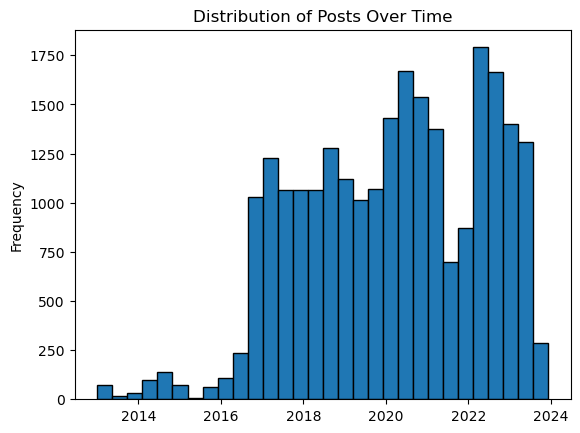

In [19]:
#Create histogram to view distribution of posts over time
df['Date'].hist(bins=30, edgecolor='k')
plt.xlabel('')
plt.ylabel('Frequency')
plt.title('Distribution of Posts Over Time')
plt.grid(False)

### Correlation Between Features

<AxesSubplot:>

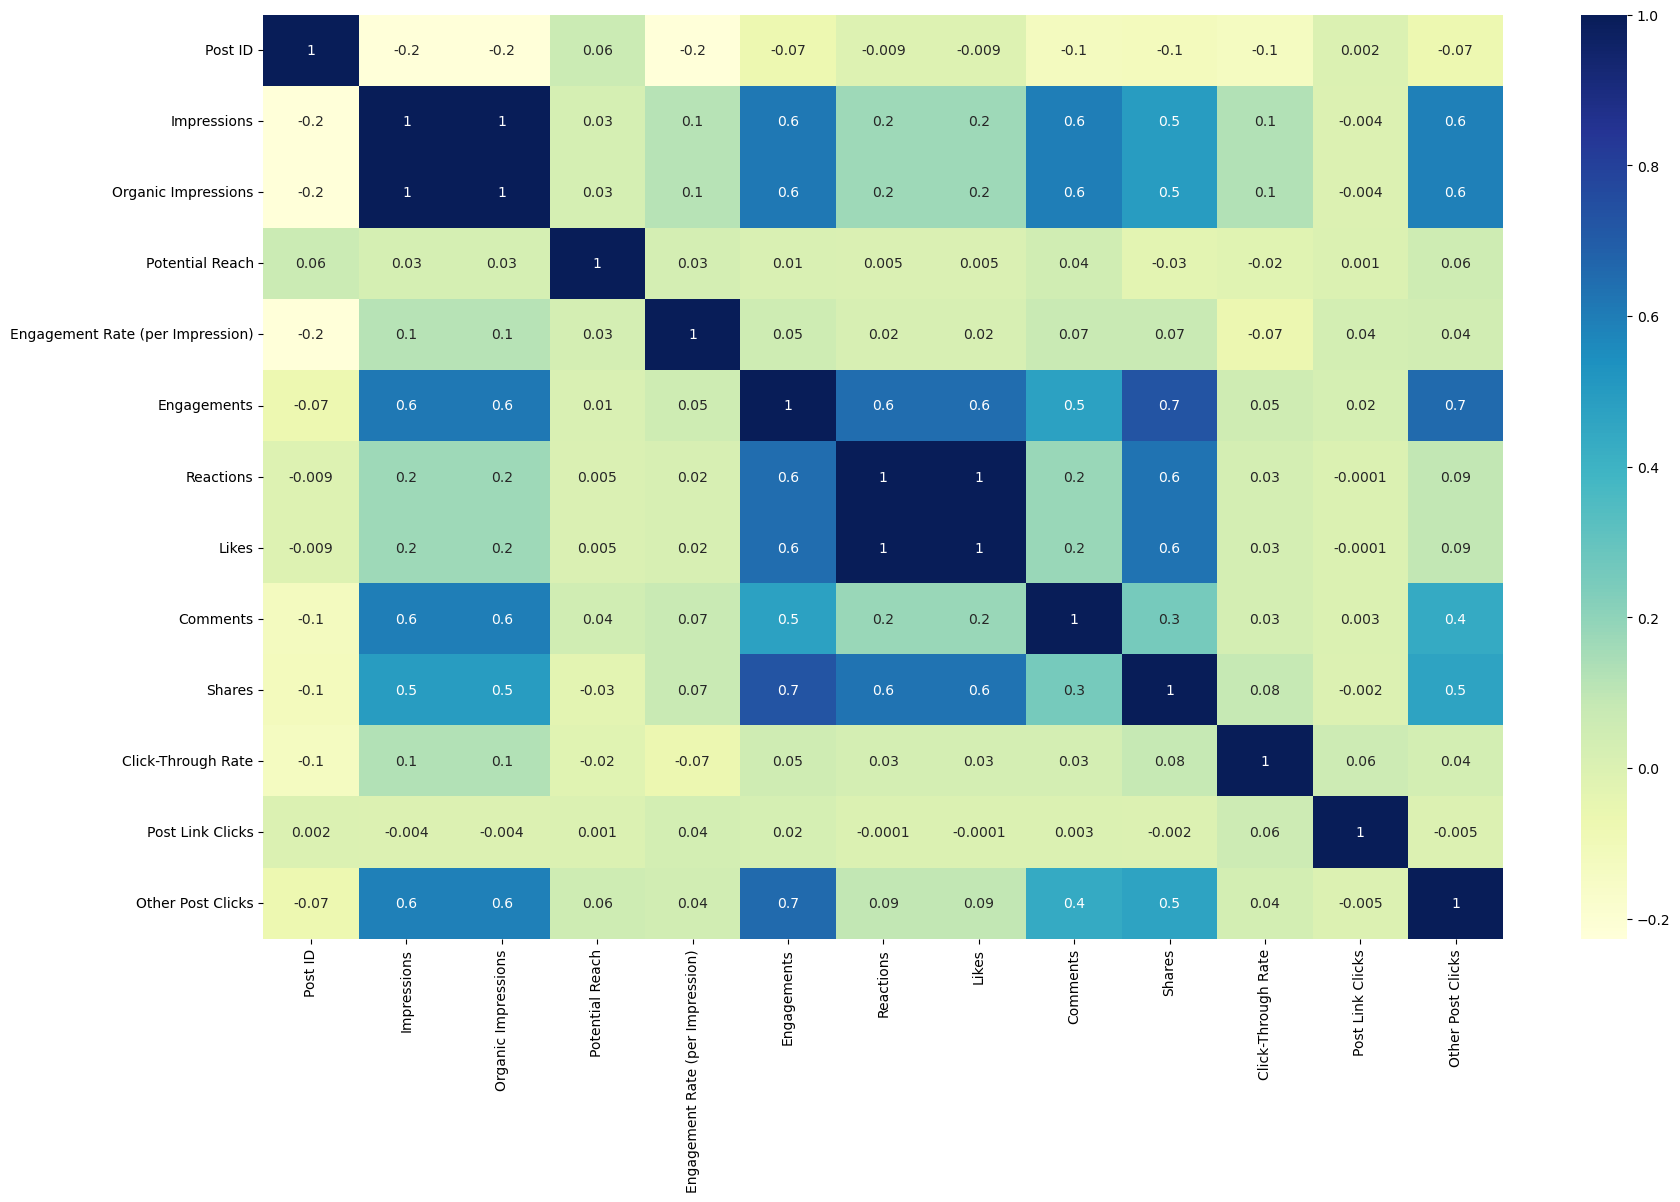

In [20]:
# Correlation matrix and heatmap
corr_matrix = df.iloc[:, :22].corr()
plt.figure(figsize=(20, 12))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt='.1g')

<AxesSubplot:>

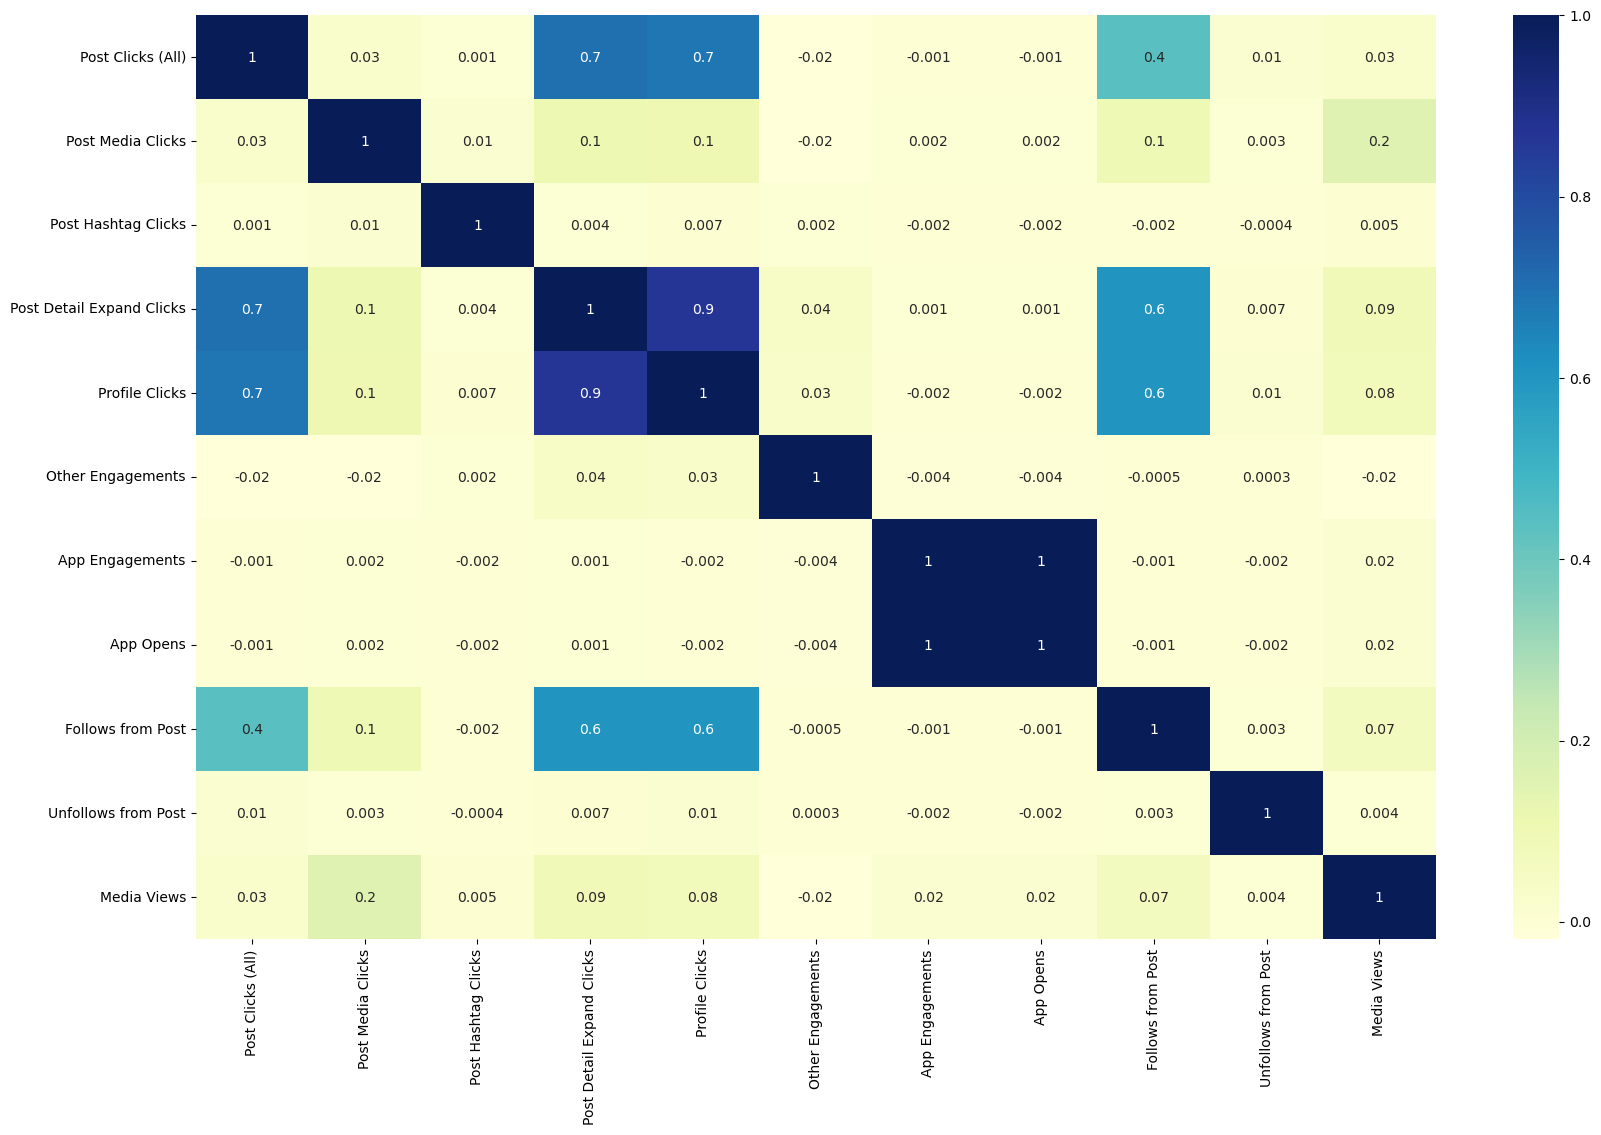

In [21]:
# Correlation matrix and heatmap
corr_matrix = df.iloc[:, 22:].corr()
plt.figure(figsize=(20, 12))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt='.1g')

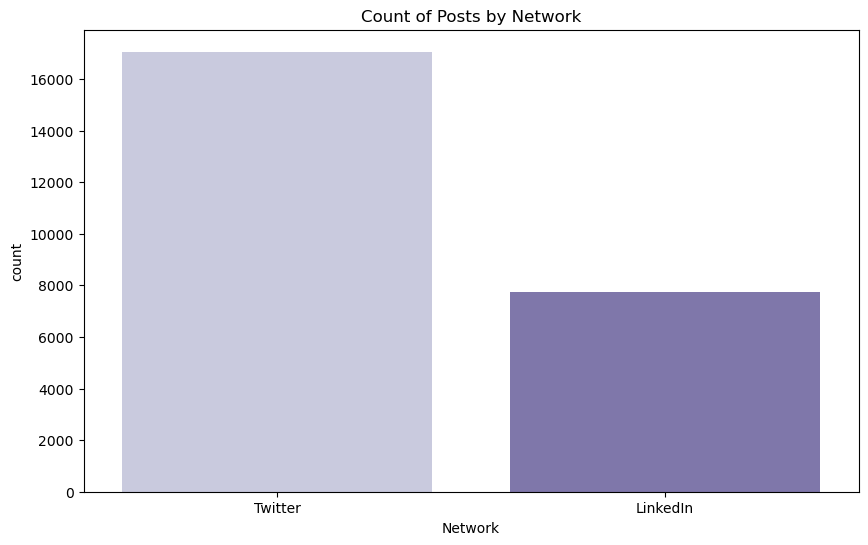

In [22]:
#Count Plot of Posts By Network
plt.figure(figsize=(10, 6))
sns.countplot(x='Network', data=df, palette = 'Purples')
plt.title('Count of Posts by Network');

In [23]:
# Feature Engineering
# Extract day of the week and hour of the day from the 'Date' column
df['Day_of_Week'] = df['Date'].dt.day_name()
df['Hour_of_Day'] = df['Date'].dt.hour

# Extract the month and year from the 'Date' column
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Create feature to check if Posts contain hashtags or not
df['Hashtags'] = df_copy['Post'].str.contains('#', regex=False)


# Define a mapping dictionary for month names
month_mapping = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May',
    6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November',12: 'December'
}

#Create list of months in the correct order
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]


# create a new feature with month names
df['Month_Name'] = df['Month'].map(month_mapping)
df['Month_Name'] = pd.Categorical(df['Month_Name'], categories=month_order, ordered=True)

#Resample the data to monthly data
df_monthly = df.set_index('Date').resample('M').sum()

#Apply log transformation
df_monthly['log_engagements'] = np.log1p(df_monthly['Engagements'])
df['log_engagements'] = np.log1p(df['Engagements'])
df.fillna(method='bfill', inplace = True)

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [24]:
#Save data after feature engineering
#Dataframe after preprocessing and cleaning
#csv file
df.to_csv('features_added.csv', index = False)

#Excel file
df.to_excel('features_added.xlsx', sheet_name = 'main_sheet', index = False)

### Are There Any Trends Over Time?

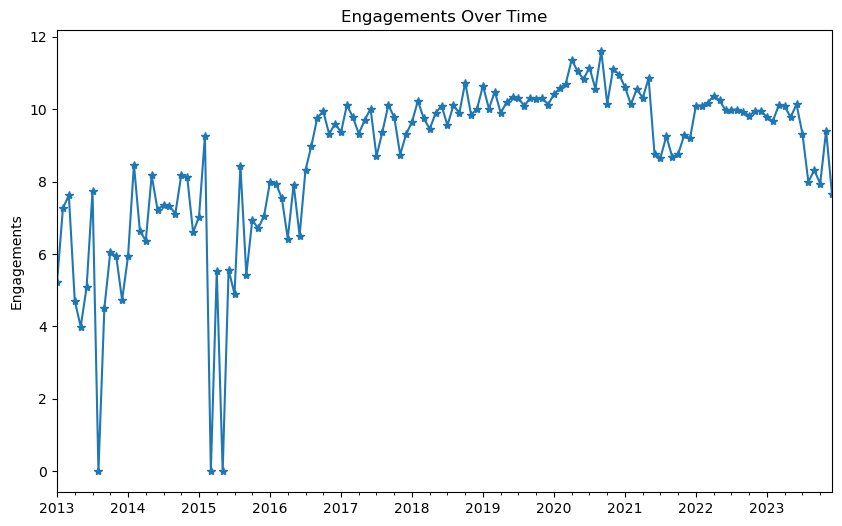

In [25]:
# Group data by date and calculate daily total engagements
daily_engagements = df_monthly.groupby('Date')['log_engagements'].sum()

# Create a line plot to visualize trends over time
plt.figure(figsize=(10, 6))
daily_engagements.plot(title='Engagements Over Time', marker = '*')
plt.xlabel('')
plt.ylabel('Engagements');


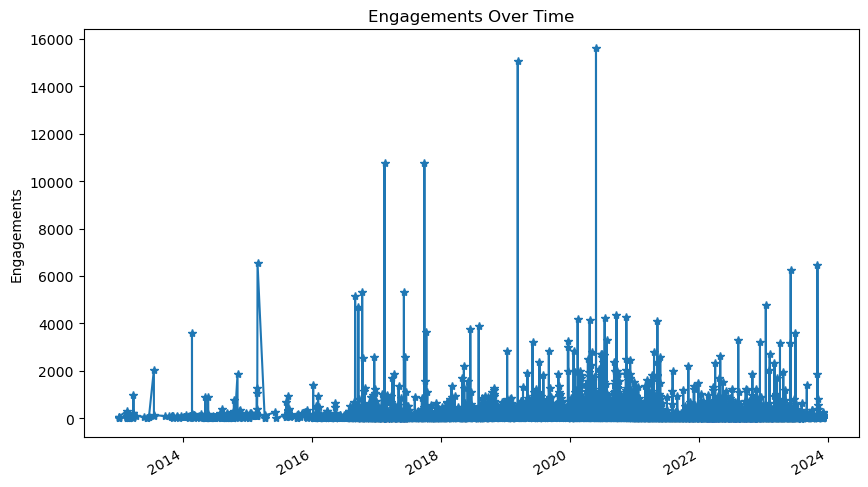

In [26]:
# Group data by date and calculate daily total engagements
daily_engagements = df.groupby('Date')['Engagements'].sum()

# Create a line plot to visualize trends over time
plt.figure(figsize=(10, 6))
daily_engagements.plot(title='Engagements Over Time', marker = '*')
plt.xlabel('')
plt.ylabel('Engagements');


### Is The Data Stationary Or Not

In [27]:
#We perform augmented Dickey - Fuller test to check if data is stationary or not
adfuller(df['Engagements'])

(-15.669565858826651,
 1.5186408675097521e-28,
 34,
 24783,
 {'1%': -3.4306138896601888,
  '5%': -2.861656631195098,
  '10%': -2.5668320793827957},
 346092.6675033669)

From the Augmented Dickey - Fuller test, the **p-value(1.5186408675097521e-28)** obtained is less than 0.05 therefore the feature 'Engagements' is not stationary, this implies that the statistical properties do not change over time.

## Analysis and Insights

### Top Posts By Engagement Rate

In [28]:
top_posts = df_copy.sort_values(by='Engagement Rate (per Impression)', ascending=False).head(5)[['Date', 'Network', 'Post', 'Engagement Rate (per Impression)', 'Link']]
print('-'* 120)
print('Top Posts By Engagement Rate')
print('-' * 120)
top_posts = top_posts.style.background_gradient()
dfi.export(top_posts,"TopPostsByEngagements.png")
top_posts

------------------------------------------------------------------------------------------------------------------------
Top Posts By Engagement Rate
------------------------------------------------------------------------------------------------------------------------


,Date,Network,Post,Engagement Rate (per Impression),Link
13204,10/21/2019 5:00 pm,Twitter,"Wouldn’t you like to know your investment personality? Risk taker or not, get the best and most suitable investment advice specifically for you. To get started, click here: https://t.co/kKYRTopEq1. #NeverStopInvesting. https://t.co/DaQveP0MgK",112.680000,https://twitter.com/StanbicIBTC/status/1186311232724373504
8702,6/3/2023 3:00 pm,Twitter,"Be a part of the excitement as gifted individuals face our judges for the opportunity of a lifetime!​ Catch all the action from the Stanbic IBTC Talent Hunt now, and witness the unveiling of new superstars - https://t.co/rMnsskHjpw​ #IgniteYourFuze​ #ITCANBE https://t.co/3mLq7FtiXn",66.400000,https://twitter.com/StanbicIBTC/status/1664995528201977856
8968,4/7/2023 4:44 pm,Twitter,"It’s finally here! The Reward4Saving 2.0 Grand Finale!🕺🏾 💃🏾 7 people will win 2 million naira.​ 7 people will win 1 million naira.​ 70 people will win 100,000 naira.​ Register now to attend - https://t.co/UK5KmPOC4W #Reward4Saving​ #ITCANBE https://t.co/wM418C9PoJ",53.260000,https://twitter.com/StanbicIBTC/status/1644365565983612928
8556,7/7/2023 3:59 pm,Twitter,"How do you pursue happiness? Your Stanbic IBTC Mutual Funds investments can bring you great financial gains. Listen to the latest episode of our enlightening series, 'Chemistry of Wealth' at https://t.co/4vCihs0phS to find out how. #ITCANBE #InvestForMore https://t.co/BolrU1Nxc6",46.850000,https://twitter.com/StanbicIBTC/status/1677331481557979137
8899,4/21/2023 4:31 pm,Twitter,"#Throwback to moments in the #Reward4Saving 2.0 Grand Finale where we crowned our prize winners. 7 people won N2 million, 7 won N1 million, & 70 won N100,000. This could be you next time 🤑 deposit N10,000 in a new or existing savings account or @ease wallet to qualify. #ITCANBE https://t.co/HxZXpFVxQw",45.930000,https://twitter.com/StanbicIBTC/status/1649435801099304961


### Which Social Media Network Performs Best?

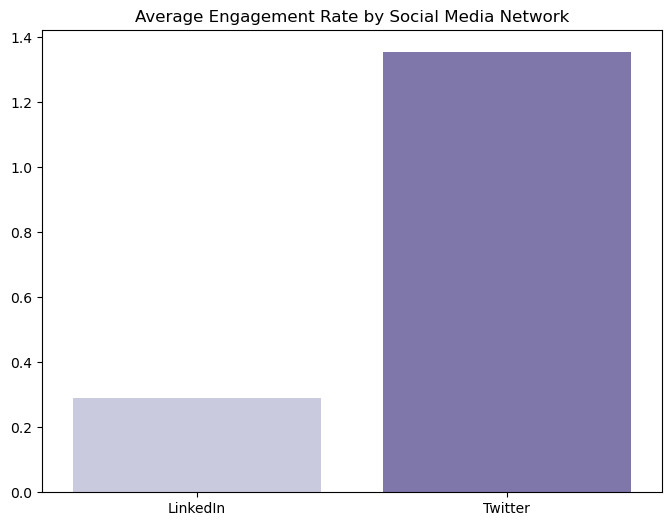

In [29]:
net_eng = df.groupby('Network')['Engagement Rate (per Impression)'].mean()
plt.figure(figsize=(8,6))
sns.barplot(x = net_eng.index, y = net_eng.values, palette = 'Purples')
plt.title('Average Engagement Rate by Social Media Network')
plt.xlabel('');

There are 2 social media platforms considered in this data, from the chat above we see that users were far more engaged on Tweeter than on LinkedIn

### When Are Peak Engagement Times?

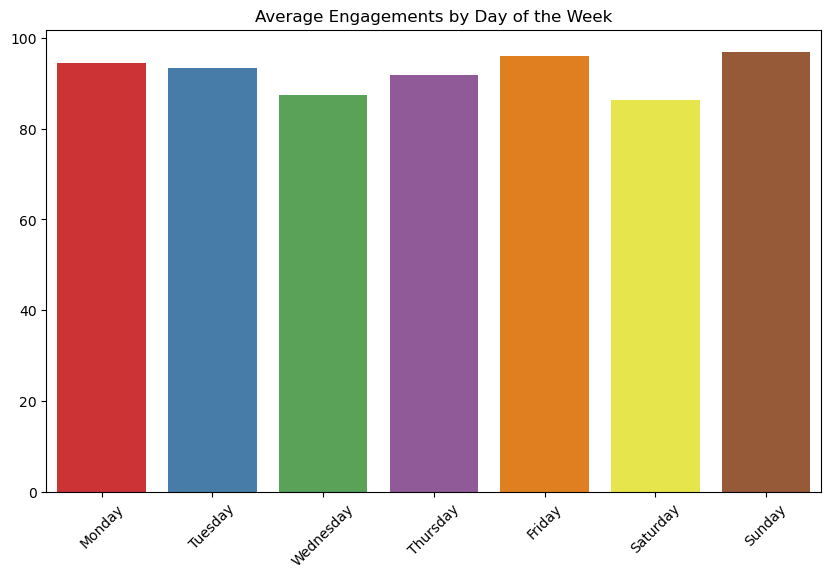

In [30]:
# Calculate average engagements by day of the week
dow_engagement = df.groupby('Day_of_Week')['Engagements'].mean()

# Create a bar plot to visualize peak engagement times by day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x = dow_engagement.index, y =dow_engagement.values, palette = 'Set1',
            order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Average Engagements by Day of the Week')
plt.xlabel('')
plt.xticks(rotation=45);


Users of the social networks(Twitter and LinkedIn) in the given dataset were most active on Friday and Sunday and were least active on wednesday.

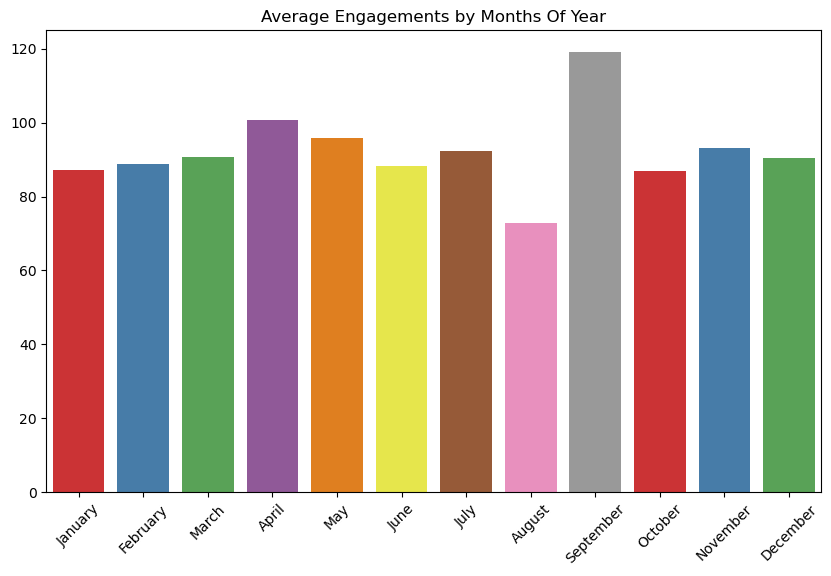

In [31]:
# Calculate average engagements by month of the year
moy_engagement = df.groupby('Month_Name')['Engagements'].mean()

# Create a bar plot to visualize peak engagement times by day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x = moy_engagement.index, y =moy_engagement.values, palette = 'Set1')
plt.title('Average Engagements by Months Of Year')
plt.xlabel('')
plt.xticks(rotation=45);

Users of the social network in this dataset were most active in September followed by April and were least active in August.

### What Is the Relationship Between Impressions and Engagement?

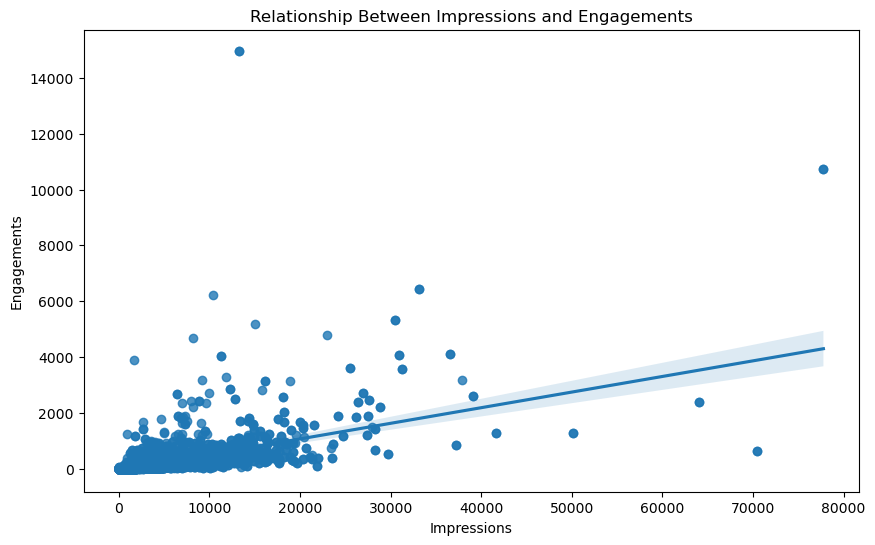

In [32]:
# Regression plot to visualize the relationship between impressions and engagements
plt.figure(figsize=(10, 6))
sns.regplot(x='Impressions', y='Engagements', data=df)
plt.title('Relationship Between Impressions and Engagements')
plt.xlabel('Impressions')
plt.ylabel('Engagements')
plt.show()


From the regression plot above, we notice that there is a linear relationship between the number of engagements and number of impressions. Furthermore, there is a positive correlation between the number of engagements and the number of impressions, indicating that when there is an increase in the number of impressions, there tends to be an increase in the number of engagements. However, it's important to note that correlation does not establish a causal relationship, and other factors may also contribute to changes in engagement.

### Which Content Types Receive the Most Shares?

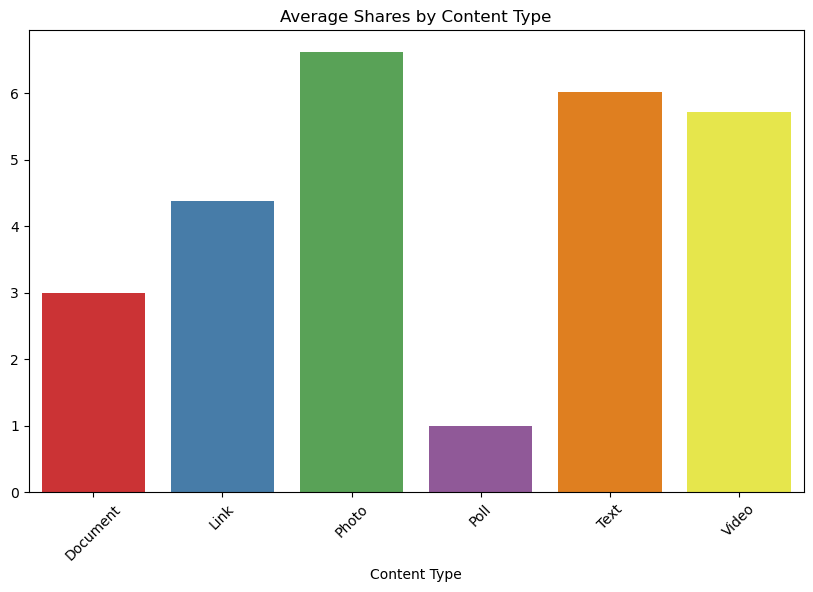

In [33]:
# Calculate average shares by content type
content_type_shares = df.groupby('Content Type')['Shares'].mean()

# Create a bar plot to visualize content type performance
plt.figure(figsize=(10, 6))
sns.barplot(x=content_type_shares.index, y=content_type_shares.values, palette = 'Set1')
plt.title('Average Shares by Content Type')
plt.xticks(rotation=45);


From the visualisation above, posts that contains photos recieved the most amount of shares, closely followed by posts that contains text while posts that contains poll had the least amount of shares.

### How Effective Are Hashtags in Driving Engagement?

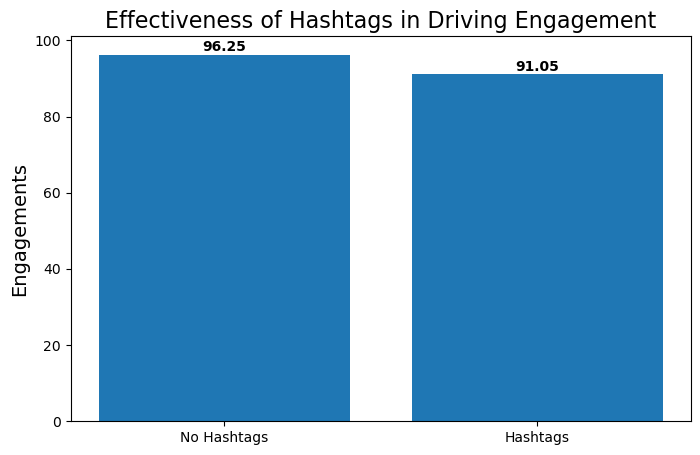

In [34]:
# Calculate the average engagement for posts with and without hashtags
hash_eff = df.groupby('Hashtags')['Engagements'].mean()

# Create a bar plot to visualize hashtag effectiveness
pct = np.round(hash_eff.values,2)
plt.figure(figsize=(8, 5))
bar = plt.bar(x = hash_eff.index, height=hash_eff.values)
plt.title('Effectiveness of Hashtags in Driving Engagement', size = 16)
plt.xticks([0, 1], ['No Hashtags', 'Hashtags'])
plt.xlabel('')
plt.ylabel('Engagements', size = 14)

i = 0
for p in bar:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2, y+height*1.01, pct[i],ha='center', weight='bold')
    i+=1

The mean number of engagements for posts without hashtags is higher than posts with hashtags, this implies that according to the data, hashtags are ineffective in driving engagements.

### How Do Different Types of Clicks Correlate with Engagement?

In [35]:
#Get the features with Clicks in their names
click_columns = [x for x in df.columns if 'Clicks' in x]

print('-'*120)
print('-'*120)
print('Correlation between Types of Clicks with Engagement')
print('-'*120)
print('')

for click_col in click_columns:
    spearman_corr, p_value = spearmanr(df[click_col], df['Engagements'])
    print('The Spearman correlation co-efficient for {} is {} while the p-value is given by {}'.format(click_col, spearman_corr, p_value))

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
Correlation between Types of Clicks with Engagement
------------------------------------------------------------------------------------------------------------------------

The Spearman correlation co-efficient for Post Link Clicks is 0.060636515712997344 while the p-value is given by 1.168167181072936e-21
The Spearman correlation co-efficient for Other Post Clicks is 0.609226128282498 while the p-value is given by 0.0
The Spearman correlation co-efficient for Post Clicks (All) is 0.9515994456148669 while the p-value is given by 0.0
The Spearman correlation co-efficient for Post Media Clicks is 0.12401143483690517 while the p-value is given by 1.2411177830822533e-85
The Spearman correlation co-efficient for Post Hashtag Clicks is -0.04225479796974

We use Spearman Rank Correlation to determine the association(correlation) between the different types of clicks with the engagement feature, from the above output, we have that there is strong positive correlation between Post Clicks (All) and Engagement, since the p-value is less than 0.05 then the correlation is statistically significant. Therefore an increase in the number of Post Clicks (All) results in an increase in the number of engagements

There is also a strong positive correlation between Post Link Clicks, Other Post Clicks and Engagement, although less than that of Post Clicks(All) and Engagement, their p-values are also less than 0.05 which implies statistical significance. Therefore that increase in Post Link Clicks, Other Post Clicks results in an increase in number of Engagements

There is a weak positive correlation between between Post Media Clicks and Engagements and moderately strong positive correlation between Post Detail Expand Clicks, Profile Clicks and Engagements.

Finally, there is a weak negative correlation between Post Hashtag Clicks and Engagements 

We note that all the p-values are all less than 0.05 which implies that the correlations are all statistically significant.

### Is There a Seasonal or Periodic Pattern in Engagement?

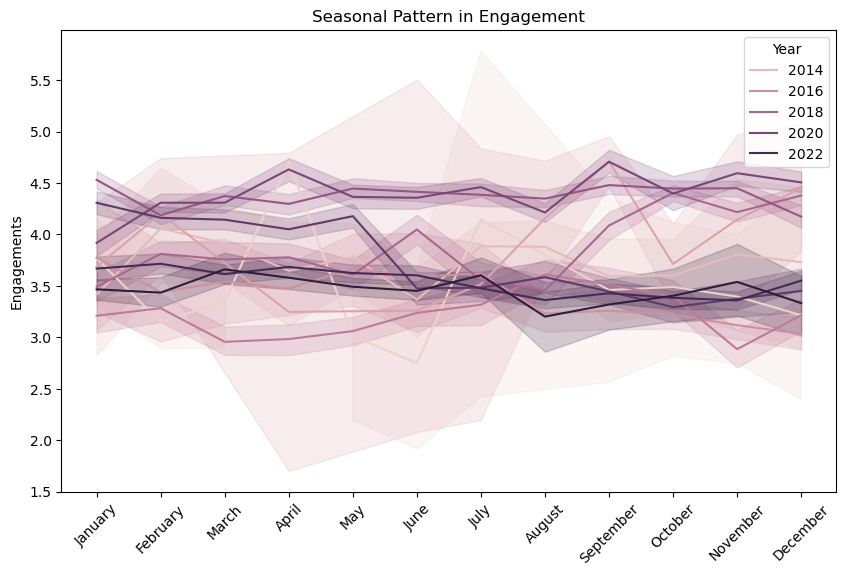

In [36]:
# Line plot to visualize engagement over time 
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month_Name', y='log_engagements', hue='Year', data=df)
plt.title('Seasonal Pattern in Engagement')
plt.xlabel('')
plt.ylabel('Engagements')
plt.legend(title='Year')
plt.xticks(rotation = 45);

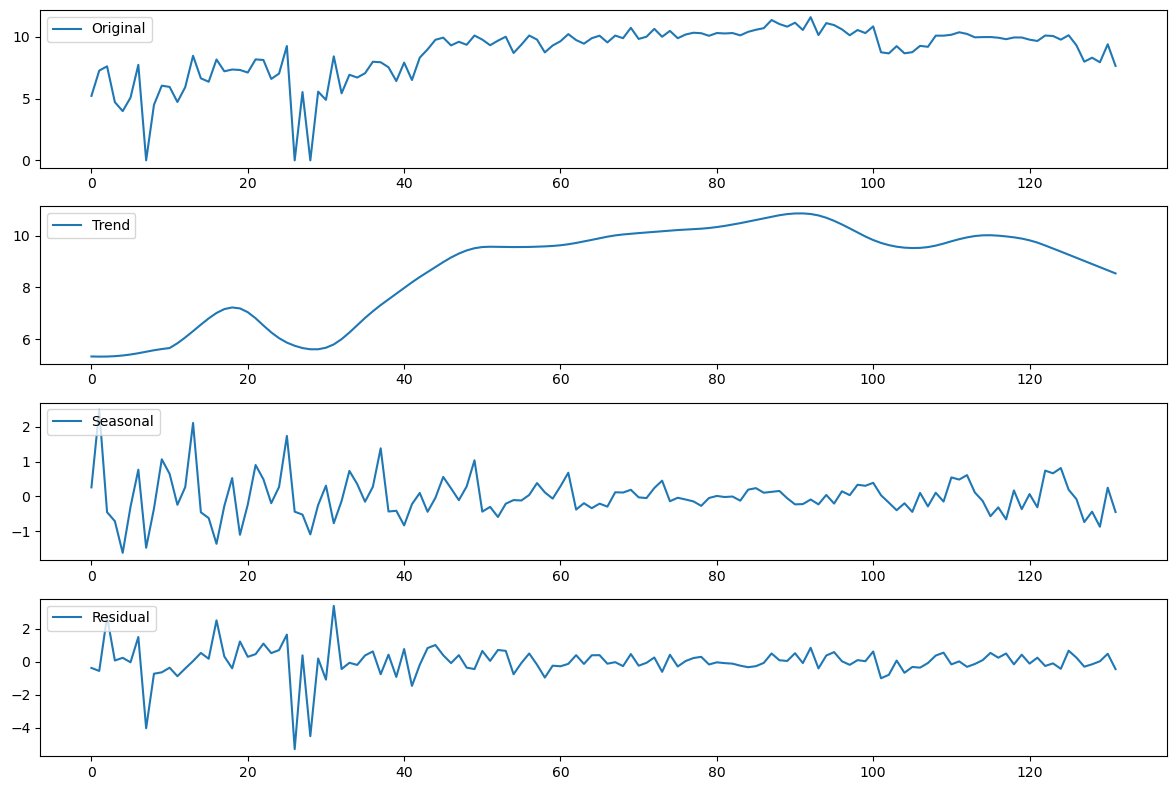

In [37]:
season_check = df_monthly[ 'log_engagements']
decomposition = STL(season_check.values, seasonal=13, period=12).fit()
seasonal, trend, residual = decomposition.seasonal, decomposition.trend, decomposition.resid

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(season_check.values, label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


### What Is the Overall Engagement Rate and How Does It Vary Across Platforms?

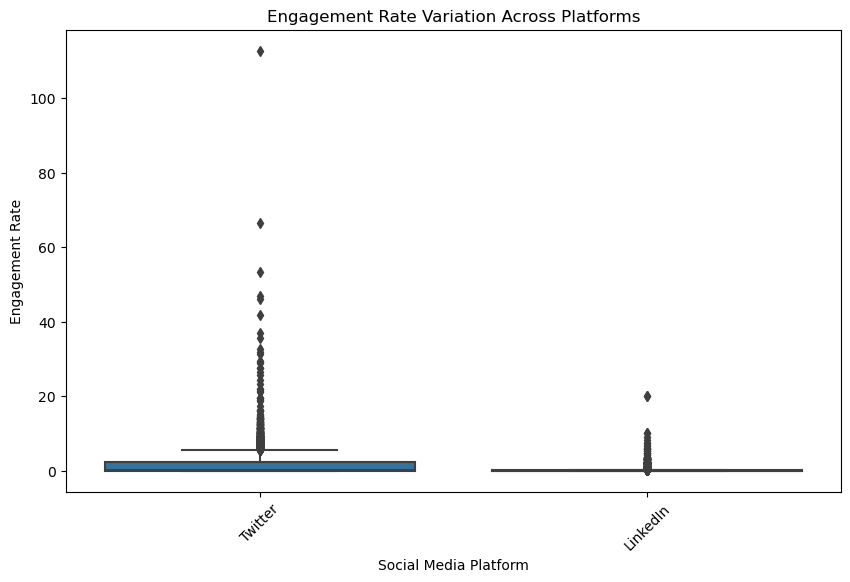

In [38]:
# Box plot to visualize the distribution of engagement rates by platform
plt.figure(figsize=(10, 6))
sns.boxplot(x='Network', y='Engagement Rate (per Impression)', data=df)
plt.title('Engagement Rate Variation Across Platforms')
plt.xlabel('Social Media Platform')
plt.ylabel('Engagement Rate')
plt.xticks(rotation=45)
plt.show()


### Most Used Words in Social Media Posts

(-0.5, 599.5, 599.5, -0.5)

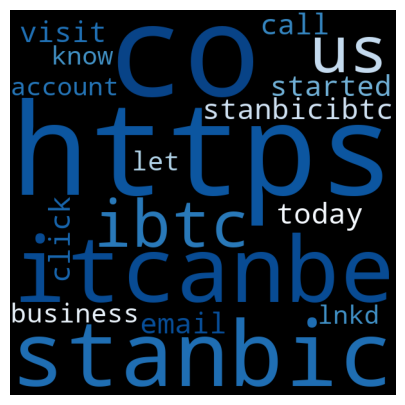

In [39]:
words = []
for i in df['Post']:
    word = word_tokenize(i)
    for j in word:
        words.append(j)
freq_word = nltk.FreqDist(words)



most_common = pd.DataFrame(freq_word.most_common(20), columns = ['Word', 'Frequency']).set_index('Word')


text=' '.join(most_common.index)
plt.figure(figsize = (9,5))
words = WordCloud(background_color='black', colormap='Blues', include_numbers=True,
                    width=600, height=600).generate(text)
plt.imshow(words)
plt.axis("off")


From the visualisation above, we can see the most commonly used words excluding **stopwords** in the posts. Frequently used words in posts includes but are not restricted to "visit", "call", "let", "today", e.t.c.